# Gaussian Process (with Squidward)

In [1]:
# GP Package
from squidward import gpr
from squidward.kernels import distance, kernel_base

# For generating and visualizing data
import numpy as np
import model_viz as mv
import generate_data as gd

In [2]:
x_train, x_test, \
y_train, y_test, \
x_true, y_true = gd.get_data(N=500, 
                             limits=(-10, 10), 
                             missing_data=False, 
                             heteroscedastic=True)

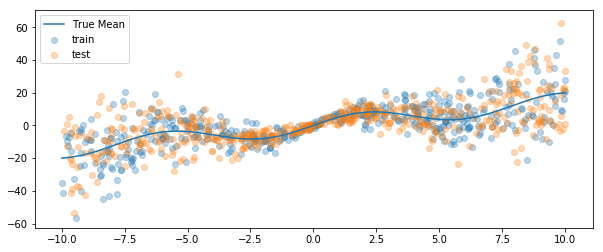

In [3]:
mv.demo_plot(x_train, y_train, x_test, y_test, x_true, y_true)

In [12]:
d = distance.RBF(2.0, 5.0**2)
kernel = kernel_base.Kernel(d, 'k1')
model = gpr.GaussianProcessInversion(kernel=kernel, var_l=10**2, inv_method='solve')
model.fit(x_train,y_train)

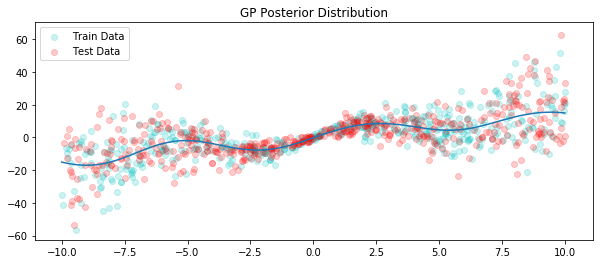

In [13]:
# generate data to plot posterior of model
x = np.linspace(-10, 10, 100)

# pull the parameters of the posterior distribution
mean, var = model.posterior_predict(x)

# plot posterior of model
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.title("GP Posterior Distribution")

plt.scatter(x_train,y_train,label='Train Data', c='c', alpha=0.2)
plt.scatter(x_test,y_test,label='Test Data', c='r', alpha=0.2)

plt.plot(x, mean)

plt.legend()
plt.show()